## INITIALIZATION

In [1]:
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
from bitarray import bitarray
from tjmonopix.tjmonopix import TJMonoPix
%matplotlib notebook

from tjmonopix.online_monitor import noise_monitor #ho importato la libreria!

In [2]:
##### if HV is on, no_power_reset=True,
##### if GPAC had power reset then no_power_reset=False

chip = TJMonoPix(conf="../tjmonopix/tjmonopix_mio3.yaml",no_power_reset=False)
chip.init(fl="EN_HV")

chip['data_rx'].CONF_START_FREEZE = 64 #default 3
chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
chip['data_rx'].CONF_START_READ = 66 #default 6
chip['data_rx'].CONF_STOP_READ = 68 #default 7
chip['data_rx'].CONF_STOP = 105 #default 45

2022-01-27 17:05:45,819 [INFO ] (MainThread) GPAC: power reset
2022-01-27 17:05:47,622 [INFO ] (MainThread) Found adapter card: General Purpose Analog Card (GPAC) with ID 3
2022-01-27 17:05:47,845 [INFO ] (MainThread) Found board 0 running firmware version 0.0
2022-01-27 17:05:48,108 [INFO ] (MainThread) ibias = 45
2022-01-27 17:05:48,124 [INFO ] (MainThread) ibias = 503.125 nA
2022-01-27 17:05:48,694 [INFO ] (MainThread) {'VPC [V]': 1.2998506463536463, 'VDDA_DAC [mA]': 2.502471747485684, 'VDDP [V]': 1.8049802771084336, 'VDDP OC': False, 'VDDA [mA]': 50.151368865825674, 'VDDD [V]': 1.8015140363636364, 'VDDA_DAC OC': False, 'VDDD [mA]': 2.820288999038665e-08, 'VPCSWSF [V]': 0.5001542395802099, 'VDDP [mA]': 128.39714805315754, 'BiasSF [V]': 1.062780289971045, 'VDDD OC': False, 'VPC [mA]': -0.2194990277309476, 'VPCSWSF [mA]': -0.027513646142112637, 'VDDA [V]': 1.8058565495495498, 'VDDA OC': False, 'VDDA_DAC [V]': 1.8035484515484517, 'BiasSF [mA]': 0.10059447096451782}


## POWER STATUS

In [3]:
#chip['BiasSF'].set_current(100, unit='uA') # SET THE SOURCE FOLLOWER READOUT CURRENT
power_status = chip.get_power_status(printen=True)

VPC [V] = 1.29985064635
VDDA_DAC [mA] = 2.50247174749
VDDP [V] = 1.80498027711
VDDP OC = False
VDDA [mA] = 50.1513688658
VDDD [V] = 1.80151403636
VDDA_DAC OC = False
VDDD [mA] = 2.82028899904e-08
VPCSWSF [V] = 0.50015423958
VDDP [mA] = 128.397148053
BiasSF [V] = 1.06278028997
VDDD OC = False
VPC [mA] = -0.208499076189
VPCSWSF [mA] = 0.0280139064001
VDDA [V] = 1.80585654955
VDDA OC = False
VDDA_DAC [V] = 1.80354845155
BiasSF [mA] = 0.100594470965


## COLUMN SETTINGS: FLAVOURS, MASKS, INJECTION

In [4]:
# SELECT WHICH DOUBLE COLUMNS (PIXEL "FLAVOURS") TO ENABLE
chip['CONF_SR']['EN_PMOS_NOSF'].setall(False)
chip['CONF_SR']['EN_PMOS'].setall(False)
chip['CONF_SR']['EN_COMP'].setall(False)
chip['CONF_SR']['EN_HV'].setall(True)
chip['CONF_SR']['EN_OUT'].setall(False) #ENABLES OR DISABLES THE NORMAL OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['nEN_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['EN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE NORMAL HITOR PADS, HITOR0-3 =  1-4 flavor, ACTIVE LOW
chip['CONF_SR']['nEN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY HITOR PADS, ACTIVE LOW

chip.write_conf()

In [5]:
# SELECT WHICH PHYSICAL COLUMNS, ROWS, DIAGONALS TO MASK
# TO MASK ONE PIXEL, MASKV, MASKH and MASKD OF THIS PIXEL SHOULD BE 0 (FALSE)
# THE MASKD NUMBER OF THE PIXEL WE WANT TO MASK (or UNMASK), IS GIVEN BY: MASKD = PHYSCOL- PHYSROW
# IF PHYSCOL-PHYSROW<0, then MASKD = 448+PHYSCOL-PHYSROW
chip['CONF_SR']['MASKD'].setall(True)
chip['CONF_SR']['MASKH'].setall(True)
chip['CONF_SR']['MASKV'].setall(True)

# TO USE THE MASK FUNCTION YOU MUST INPUT THE FLAVOR, COLUMN AND ROW
# THE FLAVOR NUMERS IS: 0 FOR PMOS_NOSF, 1 FOR PMOS, 2 FOR COMP, 3 FOR HV

chip.write_conf()

In [6]:

# SELECT WHICH PHYSICAL COLUMS TO INJECT
# INJ_IN_MON_L AND INJ_IN_MON_L SELECT THE LEFT AND RIGHT SPECIAL ANALOG MONITORING PIXELS
chip['CONF_SR']['COL_PULSE_SEL'].setall(False)

chip['CONF_SR']['INJ_IN_MON_L'] = 1 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS LEFT SIDE
chip['CONF_SR']['INJ_IN_MON_R'] = 1 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS RIGHT SIDE

# SELECT WHICH PHYSICAL ROWS TO INJECT
# THE SPEXIAL PIXELS OUTA_MON3 to OUTA_MON0 CORRESPONT TO ROWS 223 to 220 FOR INJECTION
chip['CONF_SR']['INJ_ROW'].setall(False)
chip['CONF_SR']['INJ_ROW'][223:220] = True # FOR THE ANALOG MONITORING TOP PIXEL

# SELECT PHYSICAL COLUMNS AND ROWS FOR INJECTION WITH FUNCTION
#chip.enable_injection(3,18,99)

chip.write_conf()

In [7]:
# SELECT PHYSICAL COLUMN(S) FOR HITOR OUTPUT
# nMASKH (SO SETTING MASKH TO FALSE) ENABLES HITOR FOR THE SPECIFIC ROW
chip['CONF_SR']['DIG_MON_SEL'].setall(False)
#chip.enable_column_hitor(1,18)

chip.write_conf()

## ANALOG FRONT END and INJECTION PULSE CONFIGURATION

In [8]:
vl_dac = 40
vh_dac = 80
vreset_dac = 35
icasn_dac = 0
ireset_dac = 2
ithr_dac = 90
idb_dac = 13
ibias_dac = 100


## SET THE INJECTION PULSE AMPLITUDE
## 128-bit DAC (7-bit binary equivalent)
## SET THE VOLTAGES IN ONE HOT ENCODING, ONLY ONE BIT ACTIVE AT A TIME.
## V = (127/1.8)*#BIT
# Cinj=230aF => 1.43e-/mV
# VDAC LSB=14.17mV => 20.3e-/LSB
# The default values are VL=44, VH=79, VH-VL=35 => ~710e-
CALCAP=33 ## 33 or 14.17E-3*230E-18/1.602E-19=20.3
vl = chip.set_vl_dacunits(vl_dac,1)
vh = chip.set_vh_dacunits(vh_dac,1)

chip.write_conf()

2022-01-27 17:05:49,930 [INFO ] (MainThread) vl = 0.951929133858V
2022-01-27 17:05:49,944 [INFO ] (MainThread) vh = 1.51885826772V


In [9]:
####### CONFIGURE THE FRONT END ######

# SET VRESET_P, THIS IS THE BASELINE OF THE FRONT END INPUT, ONE HOT ENCODING
vreset = chip.set_vreset_dacunits(vreset_dac, 1) #1V

## 128-bit DAC (7-bit binary equivalent)
## SET THE CURRENTS USING THERMOMETER ENCODING, I = #BITS_ACTIVE*140nA*SCALING, SCALING IS DIFFERENT FOR EACH CURRENT
## SCALING: IBIAS=10, IDB=16, ITHR=0.125, ICASN=4, IRESET=0.03125
## ACTIVE BITS SHOULD BE SET STARTING FROM THE MIDDLE e.g. for 15 active bits, (128-15)/2=56,5 so 56zeros,15ones,57zeros
## Thus, Ix[71:57] = True

# SET ICASN, THIS CURRENT CONTROLS THE OUTPUT BASELINE, BE CAREFUL NOT TO SET IT TO HIGH
# ALWAYS MONITOR THE POWER AFTER SETTING ICASN. IF VDDD IS SEVERAL mA, REDUCE IT UNTIL IT RETURNS TO 0
# ICASN MAINLY CONTROLS THE THRESHOLD
icasn = chip.set_icasn_dacunits(icasn_dac,1) #4.375nA # approx 1.084V at -3V backbias, 600mV at 0V backbias

# SET IRESET, THIS CURRENT CONTROLS THE RESET RATE OF THE FRONT END INPUT (ALSO THE THRESHOLD)
ireset = chip.set_ireset_dacunits(ireset_dac,1,1) #270pA, HIGH LEAKAGE MODE, NORMAL SCALING, 0 = LOW LEAKAGE MODE, SCALING*0.01

# SET ITHR, THIS CURRENT CONTROLS THE RESET RATE OF THE OUTPUT (AND THE THRESHOLD)
ithr = chip.set_ithr_dacunits(ithr_dac,1) #680pA ## default=5

# SET ITHR, THIS CURRENT CONTROLS THE BIASING OF THE DISCRIMINATOR (AND THE THRESHOLD)
idb = chip.set_idb_dacunits(idb_dac,1) #500nA  

# SET IBIAS, THIS CURRENT IS THE DC CURRENT OF THE MAIN BRANCH OF THE FRONT END THAT PROVIDES AMPLIFICATION
# IT CONTROLS MAINLY THE RISE TIME
ibias = chip.set_ibias_dacunits(ibias_dac,1) #500nA default=50

############ ENABLE THE DAC CURRENT MONITORING ###########
# chip['CONF_SR']['SWCNTL_DACMONI'] = 0

########## SET THE BIAS CURRENTS OF THE TWO STAGE SOURCE FOLLOWER THAT BUFFERS THE ANALOG MONITORING VOLTAGES #########
# CONTROLS THE RESPONSE TIME AND THE LEVEL SHIFT OF THE BUFFER
# chip['CONF_SR']['SET_IBUFN_L'] = 0b1001
# chip['CONF_SR']['SET_IBUFP_L'] = 0b0101

chip.write_conf()


setted_param_dac = np.array([vl_dac, vh_dac, vreset_dac, icasn_dac, ireset_dac, ithr_dac, idb_dac, ibias_dac])
setted_param = np.array([vl, vh, vreset, icasn, ireset, ithr, idb, ibias])

2022-01-27 17:05:50,046 [INFO ] (MainThread) vreset = 1.05106299213V
2022-01-27 17:05:50,068 [INFO ] (MainThread) icasn = 0
2022-01-27 17:05:50,082 [INFO ] (MainThread) icasn = 4.375 nA
2022-01-27 17:05:50,098 [INFO ] (MainThread) ireset = 2 high leakage mode
2022-01-27 17:05:50,130 [INFO ] (MainThread) ireset = 0.1025390625nA, high leakage mode
2022-01-27 17:05:50,145 [INFO ] (MainThread) ithr = 90
2022-01-27 17:05:50,167 [INFO ] (MainThread) ithr = 12.44140625 nA
2022-01-27 17:05:50,184 [INFO ] (MainThread) idb = 13
2022-01-27 17:05:50,198 [INFO ] (MainThread) idb = 245.0 nA
2022-01-27 17:05:50,214 [INFO ] (MainThread) ibias = 100
2022-01-27 17:05:50,230 [INFO ] (MainThread) ibias = 1104.6875 nA


For using external ICASN instead:
```python
chip['DACMON_ICASN'].set_current(0, unit='uA')
chip['CONF_SR']['SWCNTL_ICASN']=True
chip.write_conf()
time.sleep(1)
print chip['DACMON_ICASN'].get_voltage()
print chip['DACMON_ICASN'].get_current()
```

## Convenience functions

In [10]:
# Set mask for all pixels
def mask_all(chip, unmask=False):
    chip['CONF_SR'][chip.SET['fl']].setall(False)
    chip['CONF_SR']['EN_OUT'][chip.fl_n] = False
    chip['CONF_SR']['MASKD'].setall(unmask)
    chip['CONF_SR']['MASKH'].setall(unmask)
    chip['CONF_SR']['MASKV'].setall(unmask)
    chip.write_conf()

    chip['CONF_SR'][chip.SET['fl']].setall(True)
    chip.write_conf()

# Unmask all pixels
def unmask_all(chip):
    mask_all(chip, True)

In [11]:
# Enabled data rx FIFO
def enable_data_rx(chip, wait=0.1):
    chip['data_rx'].set_en(True)
    for _ in range(10):
        chip["fifo"].reset()
        time.sleep(wait)

In [12]:
# Receive and parse data
def recv_data(chip, dt=0.2, wait_inj=False):
    chip.reset_ibias()  # Reset Ibias and wait for oscillations to stabilize
    chip.reset_ibias()  # Oscillations may arise from configuration changes
    chip['fifo'].reset()  # Clear the buffer
    if wait_inj:
        chip["inj"].start()
        while not chip['inj'].is_ready:
            time.sleep(0.001)
    time.sleep(dt)  # Wait integration time
    return chip.interpret_data(chip['fifo'].get_data())  # Return array of hits

# Same as above, but also return array of pixels with hits and number of hits per pixel
def recv_data_summary(chip, dt=0.2, wait_inj=False):
    hits = recv_data(chip, dt, wait_inj)
    pixels, hits_per_pixel = np.unique(hits[["col", "row"]], return_counts=True)
    return hits, pixels, hits_per_pixel


In [16]:
# Matrix plotter
def tj_plot(chip, dt=0.2, wait_inj=False):
    enable_data_rx(chip)
    hits, pixels, hits_per_pixel = recv_data_summary(chip, dt, wait_inj)
    
    print("Got %d hits in %g s" % (len(hits), dt))
    
    # Plot of the pixel matrix (2D histogram of number of hits vs row/col)
    plt.figure()
    plt.hist2d(hits["col"], hits["row"], bins=[112,224], range=[[0,112],[0,224]],
               )#norm=matplotlib.colors.LogNorm(vmin=1))
    plt.colorbar()

    # Histogram of the hits-per-pixel distribution (to choose noise threshold)
    plt.figure()
    plt.hist(hits_per_pixel, bins=100)
    plt.figure()
    plt.hist(hits_per_pixel, bins=101, range=[0,100])
    return hits, pixels, hits_per_pixel

In [22]:
# Our own automask (TJMonopix.auto_mask but improved)
def our_auto_mask(chip, th=10, step=50, dt=0.2):
    mask_all(chip)
    enable_data_rx(chip)

    # Set of noisy pixels to fill, as tuples (flavor, col, row)
    noisy_pixels = set()

    def find_new_noisy_pixels():
        # Get hits and see which pixels are noisy
        hits, pixels, hits_per_pixel = recv_data_summary(chip, dt)
        for px, n_hits in zip(pixels, hits_per_pixel):
            if n_hits >= th:
                if 0 <= px['col'] <= 111 and 0 <= px['row'] <= 223:
                    noisy_pixels.add((chip.fl_n, px["col"], px["row"]))
                else:  # This happens due to a bug or communication error
                    print("Warning: invalid pixel with col,row = %d,%d" % (px['col'], px['row']))
        print("Got %d hits, total noisy pixels: %d" % (len(hits), len(noisy_pixels)))

    # Iterate over MASKH to find noisy pixels
    for i in np.append(range(step, len(chip['CONF_SR']['MASKH']), step), 223):
        # Unmask step rows at a time
        chip['CONF_SR']['MASKH'][i:0] = (int(i) + 1) * bitarray('1')
        # Mask noisy pixels that we found before
        for flavor, col, row in noisy_pixels:
            chip.mask(flavor, col, row)
        chip['CONF_SR'].write()

        print("Enable MASKH %d" % i)
        find_new_noisy_pixels()

    # Iterate over MASKV to find noisy pixels
    for i in np.append(range(step, 111, step), 111):
        # Unmask step columns at a time, while keeping all rows unmasked
        chip['CONF_SR']['MASKV'][i + (chip.fl_n * 112):(chip.fl_n * 112)] = (int(i) + 1) * bitarray('1')
        # Mask noisy pixels that we found before
        for flavor, col, row in noisy_pixels:
            chip.mask(flavor, col, row)
        chip['CONF_SR'].write()

        print("Enable MASKV %d" % i)
        find_new_noisy_pixels()

    # Iterate over MASKD to find noisy pixels
    for i in np.append(range(step, len(chip['CONF_SR']['MASKD']) - 1, step), len(chip['CONF_SR']['MASKD']) - 1):
        # Unmask step diagonals at a time, while keeping all rows and cols unmasked
        chip['CONF_SR']['MASKD'][i:0] = (int(i)+1)*bitarray('1')
        # Mask noisy pixels that we found before
        for flavor, col, row in noisy_pixels:
            chip.mask(flavor, col, row)
        chip['CONF_SR'].write()

        print("Enable MASKD %d" % i)
        find_new_noisy_pixels()

    # Mask all previously-found noisy pixels and check again
    for flavor, col, row in noisy_pixels:
        chip.mask(flavor, col, row)
    chip['CONF_SR'].write()

    print("Checking again after masking")
    find_new_noisy_pixels()

    # Mask additionally found noisy pixels
    for flavor, col, row in noisy_pixels:
        chip.mask(flavor, col, row)
    chip['CONF_SR'].write()
    chip['fifo'].reset()
    time.sleep(0.3)
    chip.reset_ibias()

    print("Noisy pixels: %d" % len(noisy_pixels))
    # Get masked pixels using a convenience function of the TJMonopix class
    mask = chip.get_disabled_pixel(maskV=chip['CONF_SR']['MASKV'], maskH=chip['CONF_SR']['MASKH'], maskD=chip['CONF_SR']['MASKD'])
    total_enabled = np.shape(np.argwhere(mask[(chip.fl_n * 112):(chip.fl_n + 1) * 112, :] != 0))[0]
    total_disabled = np.shape(np.argwhere(mask[(chip.fl_n * 112):(chip.fl_n + 1) * 112, :] == 0))[0]
    print("Enabled pixels: %d" % total_enabled)
    print("Disabled pixels (noisy + unintentionally masked): %d" % total_disabled)
    return noisy_pixels, total_disabled


## ENABLE MASK

Got 238170 hits in 0.2 s


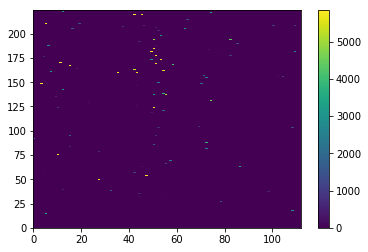

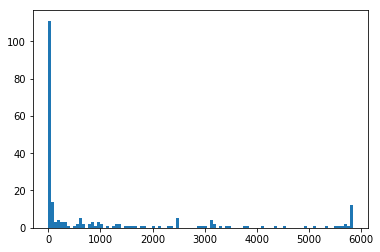

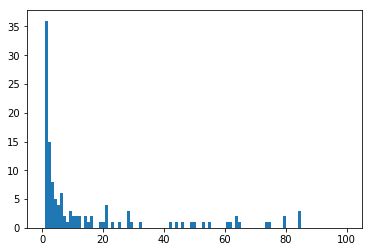

In [17]:
# Check plot before masking
unmask_all(chip)
tj_plot(chip);

Enable MASKH 50
Got 36744 hits, total noisy pixels: 13
Enable MASKH 100
Got 136145 hits, total noisy pixels: 39
Enable MASKH 150
Got 156464 hits, total noisy pixels: 67
Enable MASKH 200
Got 215938 hits, total noisy pixels: 108
Enable MASKH 223
Got 186307 hits, total noisy pixels: 131
Enable MASKV 50
Got 110 hits, total noisy pixels: 131
Enable MASKV 100
Got 142 hits, total noisy pixels: 131
Enable MASKV 111
Got 157 hits, total noisy pixels: 131
Enable MASKD 50
Got 166 hits, total noisy pixels: 131
Enable MASKD 100
Got 141 hits, total noisy pixels: 131
Enable MASKD 150
Got 1537 hits, total noisy pixels: 131
Enable MASKD 200
Got 274 hits, total noisy pixels: 132
Enable MASKD 250
Got 161 hits, total noisy pixels: 132
Enable MASKD 300
Got 1613 hits, total noisy pixels: 132
Enable MASKD 350
Got 266 hits, total noisy pixels: 132
Enable MASKD 400
Got 734 hits, total noisy pixels: 132
Enable MASKD 447
Got 2592 hits, total noisy pixels: 132
Checking again after masking
Got 1327 hits, total nois

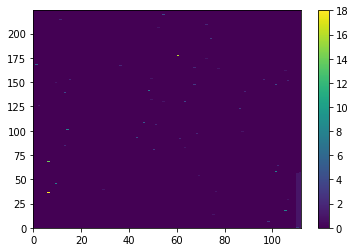

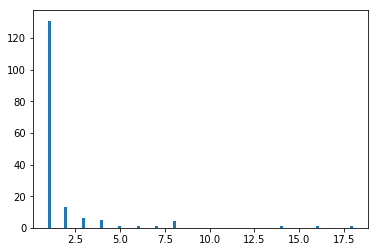

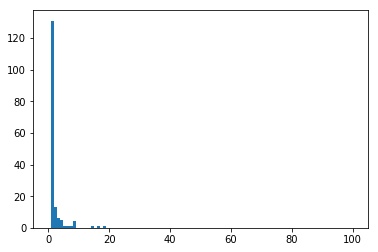

In [23]:
# Auto-mask and plot again
noisy_pixels, n_disabled_pixels = our_auto_mask(chip, th=20)
tj_plot(chip);

In [25]:
#save some outout monitor files
date_string = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
output_file_noisy_pixels = date_string + '_noisy_pixels.txt'
output_file_parameters = 'parameters.txt'
output_file_power_status = date_string + 'power_status.txt'
noise_monitor.save_noisy_pixels(np.array(list(noisy_pixels)), output_file_noisy_pixels)
noise_monitor.save_param_and_noise(
    setted_param_dac, setted_param, len(noisy_pixels), n_disabled_pixels, output_file_parameters)
noise_monitor.save_power_status(power_status, output_file_power_status)

2022-01-27 17:13:48,611 [INFO ] (MainThread) Output file saved!
2022-01-27 17:13:48,627 [INFO ] (MainThread) Output file 'parameters.txt' saved!
2022-01-27 17:13:48,641 [INFO ] (MainThread) Output file saved!


## ENABLE INJECTION

In [26]:
### check noise occupancy
exp_time = 1
chip.get_occupancy(exp_time)

Number of pixels counted: 1156
(101, 58) 76
(60, 177) 64
(6, 36) 63
(6, 68) 57
(46, 108) 56
(105, 17) 51
(48, 141) 48
(86, 122) 48
(67, 147) 43
(43, 92) 40
(63, 82) 40
(9, 45) 34
(54, 219) 34
(50, 80) 32
(63, 129) 28
(14, 101) 26
(13, 139) 26
(101, 147) 23
(11, 214) 21
(77, 163) 19
(102, 64) 15
(98, 6) 13
(105, 161) 13
(1, 168) 12
(53, 155) 11
(78, 18) 11
(2, 125) 10
(56, 185) 9
(87, 198) 9
(52, 206) 9
(110, 0) 8
(96, 152) 8
(67, 164) 8
(74, 194) 7
(36, 166) 7
(106, 29) 7
(46, 17) 6
(68, 97) 6
(61, 91) 6
(54, 129) 6
(83, 127) 6
(70, 41) 6
(88, 78) 6
(72, 209) 6
(76, 37) 6
(87, 99) 5
(5, 201) 5
(55, 14) 5
(56, 209) 4
(72, 174) 4
(88, 140) 4
(11, 29) 4
(88, 44) 4
(15, 152) 4
(13, 84) 4
(92, 165) 3
(25, 141) 3
(19, 156) 3
(0, 28) 3
(12, 127) 3
(51, 122) 3
(80, 190) 3
(106, 151) 3
(20, 184) 2
(8, 169) 2
(104, 221) 2
(3, 96) 2
(69, 53) 2
(68, 179) 2
(46, 168) 2
(54, 109) 2
(49, 153) 2
(49, 152) 2
(43, 3) 1
(102, 136) 1
(9, 116) 1
(99, 144) 1
(6, 163) 1
(109, 22) 1
(99, 80) 1
(77, 2) 1
(4, 1

Got 107 hits in 0.2 s
((9, 149), 1)
((25, 65), 1)
((49, 33), 1)
((75, 13), 1)
((80, 171), 1)
((90, 152), 1)
((91, 192), 1)
((18, 25), 100)


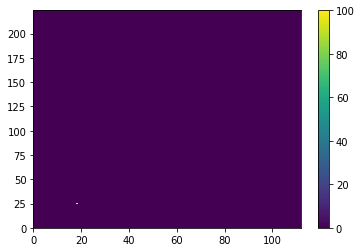

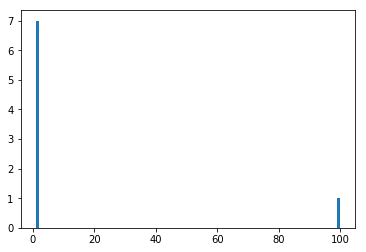

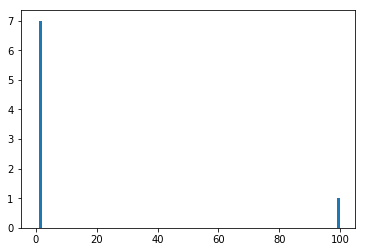

In [28]:
## configure injection pulse and inject pulses to one pixel
col_to_inject = 18
row_to_inject = 25

delay=800
width=250
repeat=100
chip['inj'].set_delay(delay)
chip['inj'].set_width(width)
chip['inj'].set_repeat(repeat)
chip['inj'].set_phase(0)
chip['inj'].set_en(0)

chip['CONF_SR']['INJ_ROW'].setall(False)
chip['CONF_SR']['COL_PULSE_SEL'].setall(False)
chip.enable_injection(3, col_to_inject, row_to_inject)
chip.write_conf()

_, pixels, hits_per_pixel = tj_plot(chip, wait_inj=True)
chip['data_rx'].set_en(False)

arg = np.argsort(hits_per_pixel)
for px, n_hits in zip(pixels[arg], hits_per_pixel[arg]):
    print(px, n_hits)
    # chip.mask(3, px[0], px[1]) # Do we need this?

## INJECTION SCANS -  S-CURVE

In [31]:
injlist=np.arange(80,0,-1)

inj_low=chip.get_vl_dacunits()
chip['data_rx'].set_en(True)
for _ in range(5):
    chip['fifo'].reset()
    time.sleep(0.002)
    
time.sleep(2)

cnt=np.empty(len(injlist))
tot=np.empty(len(injlist))
for inj_i,inj in enumerate(injlist):
    chip.set_vh_dacunits(inj+inj_low,0)
    chip.write_conf()
    for _ in range(5):
        chip['fifo'].reset()
        time.sleep(0.002)
    chip.set_monoread()
    chip["inj"].start()
    while not chip['inj'].is_ready:
        time.sleep(0.001)
    time.sleep(0.02)
    x = chip['fifo'].get_data()
    ix = chip.interpret_data(x)
    ix_inj=ix[np.bitwise_and(ix["col"]==col_to_inject,ix["row"]==row_to_inject)]
    print inj,len(ix),len(ix_inj),np.average((ix_inj["te"]-ix_inj["le"]) & 0x3F)
    cnt[inj_i]=len(ix_inj)
    tot[inj_i]=np.average((ix_inj["te"]-ix_inj["le"]) & 0x3F)

80 102 100 6.04
79 102 100 6.09
78 100 100 6.17
77 102 100 6.06
76 101 100 6.06
75 105 100 6.14
74 101 100 6.05
73 101 100 6.04
72 103 100 6.16
71 103 100 6.17
70 101 100 6.14
69 101 100 6.01
68 100 100 5.97
67 101 100 6.08
66 101 100 6.12
65 102 100 5.94
64 102 100 6.01
63 101 100 5.98
62 104 100 5.86
61 104 100 5.82
60 102 100 5.77
59 100 100 5.71
58 101 100 5.6
57 103 100 5.55
56 102 100 5.53
55 100 100 5.45
54 100 100 5.39
53 100 100 5.36
52 103 100 5.28
51 102 100 5.18
50 104 100 5.03
49 102 100 4.98
48 101 100 4.84
47 101 100 4.81
46 101 100 4.6
45 102 100 4.56
44 103 100 4.5
43 101 100 4.45
42 100 100 4.25
41 103 100 4.24
40 104 100 4.24
39 100 100 4.11
38 102 100 3.84
37 101 100 3.81
36 101 100 3.53
35 103 100 3.36
34 100 100 3.06
33 101 100 2.89
32 101 100 2.77
31 100 100 2.57
30 101 100 2.34
29 100 100 2.01
28 100 100 1.79
27 99 98 1.5
26 86 85 1.5294117647058822
25 80 76 1.4078947368421053
24 72 70 1.2285714285714286
23 56 54 0.9074074074074074
22 32 30 0.9666666666666667
21

approx. th = 23 DAC = 759 e-


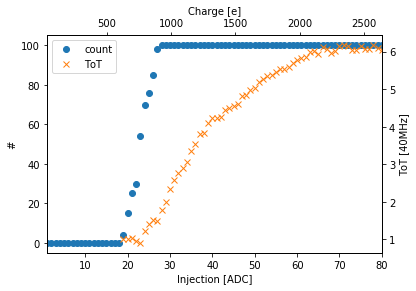

Exception in thread TcpReadoutThread:
Traceback (most recent call last):
  File "C:\ProgramData\Miniconda2\lib\threading.py", line 801, in __bootstrap_inner
    self.run()
  File "C:\ProgramData\Miniconda2\lib\threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "c:\users\belle2\basil\basil\TL\SiTcp.py", line 406, in _tcp_readout
    data = bytearray(self._sock_tcp.recv(1024 * 8))
error: [Errno 10054] Connessione in corso interrotta forzatamente dall'host remoto



In [37]:
### plot

approx_th = injlist[np.argmin(np.abs(cnt-repeat/2))]
print "approx. th = %d DAC = %g e-" % (approx_th, approx_th*CALCAP)
fig,ax=plt.subplots(1,1)
ax.plot(injlist,cnt,"C0o",label="count")
ax2=ax.twiny()
ax3=ax.twinx()
ax3.plot(injlist,tot,"C1x",label="ToT")
ax.plot([],[],"C1x",label="ToT")

ax.set_xlabel("Injection [ADC]")
ax.set_ylabel("#")
ax3.set_ylabel("ToT [40MHz]")
ax2.set_xlabel("Charge [e]")
ax.set_xbound(np.min(injlist),np.max(injlist))
ax2.set_xbound(np.min(injlist)*CALCAP,np.max(injlist)*CALCAP)
ax.legend();